In [2]:
import pandas as pd
col = ['preg','plas','pres','skin','test','mass','pedi','age','class']
pima = pd.read_csv("pima-indians-diabetes.csv", names=col)
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.pres.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [4]:
pima.groupby("preg")["class"].mean()

preg
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: class, dtype: float64

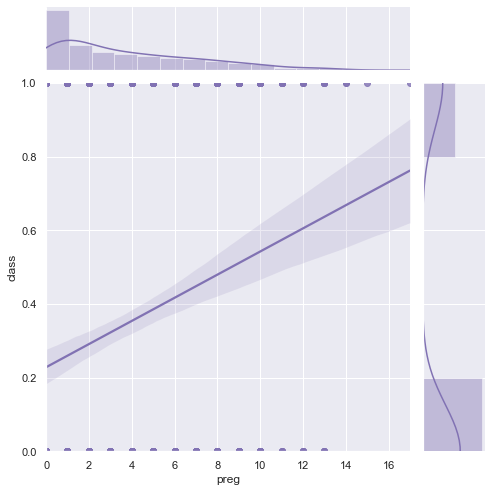

In [5]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("preg", "class", data=pima,
                  kind="reg", truncate=False,
                  xlim=(0, 17), ylim=(0, 1),
                  color="m", height=7)

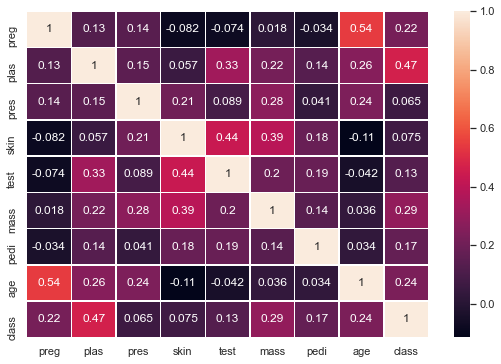

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pima.corr(), annot=True, linewidths=.5, ax=ax)

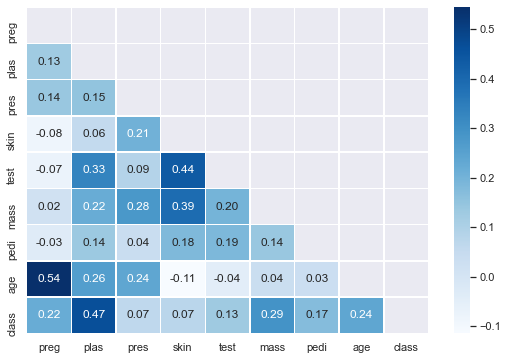

In [14]:
import numpy as np
pimacorr = pima.corr()

plt.figure(figsize=(9,6))
mask = np.zeros_like(pimacorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = pimacorr, annot=True, mask=mask,
            fmt = '.2f', linewidths=.5, cmap='Blues')

In [34]:
# 데이터셋 정리
xdata = np.array(pima.iloc[:,:-1])
ydata = np.array(pima.iloc[:,[-1]])
print(xdata.shape)
print(ydata.shape)

# 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(xdata)
xdata=ss.transform(xdata)

print("--"*5)
# 트레이닝 / 테스트 나누기
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xdata,ydata,test_size=0.3, random_state=321, shuffle=True)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(768, 8)
(768, 1)
----------
(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # 텐서플로우 버전 1로 낮추기 (버전 2 기능 사용불가하게 만들기)

In [57]:
# 변수정의
x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([8,1],mean=0.01,stddev=0.01)) # 행렬곱(matmul)해야해서 2,1 로 설정
b = tf.Variable(tf.random_normal([1])) # 더해주기만 하면 돼서 1로 설정

# 식 정의
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# 텐서플로우의 타입변경함수
predicted = tf.cast(hf>0.5, dtype=tf.float32) # boolean -> float (True:1, False:0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32)) # boolean -> float 맞추면 1 틀리면 0

In [58]:
with tf.Session() as sess : #sess = tf.Session() 말고 이걸 하는이유 : 메모리자원 확보
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv = sess.run([train,cost], feed_dict={x:xtrain, y:ytrain})
        if step%400==0:
            print(step,cv)
    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x:xtest, y:ytest})
    print("hf : ",h,"pred : ",p,"acc : ",a)

0 1.2864953
400 0.59547794
800 0.48548365
1200 0.45906246
1600 0.4503333
2000 0.44677308
2400 0.44511688
2800 0.44428188
3200 0.44383916
3600 0.44359675
4000 0.44346115
4400 0.4433841
4800 0.44333997
5200 0.44331437
5600 0.44329947
6000 0.4432908
6400 0.4432857
6800 0.4432827
7200 0.44328094
7600 0.44327986
8000 0.44327927
8400 0.44327894
8800 0.4432787
9200 0.44327858
9600 0.4432785
10000 0.4432785
10400 0.44327843
10800 0.44327846
11200 0.44327843
11600 0.44327843
12000 0.4432784
12400 0.44327837
12800 0.44327843
13200 0.44327837
13600 0.44327837
14000 0.44327843
14400 0.4432784
14800 0.4432784
15200 0.4432784
15600 0.4432784
16000 0.44327843
16400 0.44327843
16800 0.4432784
17200 0.4432784
17600 0.4432784
18000 0.4432784
18400 0.4432784
18800 0.4432784
19200 0.4432784
19600 0.4432784
20000 0.4432784
hf :  [[0.23073304]
 [0.29849547]
 [0.8251783 ]
 [0.1084803 ]
 [0.09329373]
 [0.06313264]
 [0.04493982]
 [0.15842894]
 [0.2735173 ]
 [0.3072508 ]
 [0.89810854]
 [0.23844287]
 [0.5871028 